In [1]:
import projetannuel as pa 
help(pa)

Help on package projetannuel:

NAME
    projetannuel

DESCRIPTION
    A Python module implemented in Rust. The name of this function must match
    the `lib.name` setting in the `Cargo.toml`, else Python will not be able to
    import the module.

PACKAGE CONTENTS
    projetannuel

CLASSES
    builtins.object
        builtins.LinearModel
        builtins.MLP
        builtins.RBF
        builtins.SVM
        builtins.SVMKernelType
    
    class LinearModel(object)
     |  LinearModel(x, y)
     |  
     |  Methods defined here:
     |  
     |  predict(self, /, x)
     |  
     |  train_classification(self, /, epochs, learning_rate, algo)
     |  
     |  train_regression(self, /)
     |  
     |  ----------------------------------------------------------------------
     |  Static methods defined here:
     |  
     |  __new__(*args, **kwargs) from builtins.type
     |      Create and return a new object.  See help(type) for accurate signature.
     |  
     |  -----------------------

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Génère des données linéairement séparables en 2D
X, y = make_classification(n_samples=100, n_features=2, 
                           n_redundant=0, n_clusters_per_class=1,
                           class_sep=2.0, random_state=42)

# Convertit les labels en -1 / +1 pour le SVM
y = 2 * y - 1

X_train = X.tolist()
y_train = y.tolist()


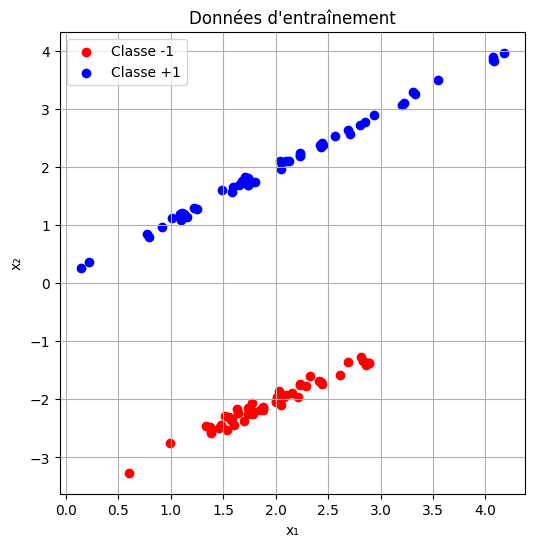

In [3]:
plt.figure(figsize=(6, 6))
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color="red", label="Classe -1")
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color="blue", label="Classe +1")
plt.title("Données d'entraînement")
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.legend()
plt.grid(True)
plt.show()


In [4]:
from projetannuel import SVM, SVMKernelType

# Initialise le modèle avec noyau linéaire
model = SVM(SVMKernelType.Linear())

# Entraîne le modèle
model.train(X_train, y_train)
